In [47]:
import pandas as pd
df=pd.read_csv(r'C:\Users\purdi\Documents\proyecto_final\air-quality-politics\data\df_full_completo_filtrado.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142164 entries, 0 to 142163
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Causa de muerte    142164 non-null  object 
 1   Sexo               142164 non-null  object 
 2   Provincias         142164 non-null  object 
 3   mes                142164 non-null  int64  
 4   year               142164 non-null  int64  
 5   Muertes_por_causa  142164 non-null  float64
 6   codigo_provincia   142164 non-null  int64  
 7   LATITUD_G          142164 non-null  float64
 8   LONGITUD_G         142164 non-null  float64
 9   ALTITUD            142164 non-null  float64
 10  TIPO_AREA          142164 non-null  object 
 11  VALOR_ICA          142164 non-null  float64
 12  CATEGORIA_ICA      142164 non-null  object 
 13  Partido            142164 non-null  object 
 14  Poblacion          142164 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 16

In [40]:
df.head()

,causa_de_muerte,sexo,provincias,mes,anio,muertes_por_causa,codigo_provincia,latitud_g,longitud_g,altitud,tipo_area,valor_ica,CATEGORIA_ICA,partido,poblacion,muertes_log,riesgo_ica,muertes_por_100k
0,001-102 I-XXII.Todas las causas,Hombres,02 Albacete,1,2022,209.072686,2,38.9808,-1.8452,691.0,SUBURBANA,22.778847,Buena,PP,199208.0,5.347454,Riesgo_ICA_Medio,104.951953
1,001-102 I-XXII.Todas las causas,Hombres,02 Albacete,2,2022,150.678320,2,38.9808,-1.8452,691.0,SUBURBANA,20.110090,Razonablemente buena,PP,11435.0,5.021762,Riesgo_ICA_Medio,1317.694096
2,001-102 I-XXII.Todas las causas,Hombres,02 Albacete,3,2022,173.097586,2,38.9808,-1.8452,691.0,SUBURBANA,26.769706,Buena,PP,10762.0,5.159616,Riesgo_ICA_Medio,1608.414658
3,001-102 I-XXII.Todas las causas,Hombres,02 Albacete,4,2022,179.875503,2,38.9808,-1.8452,691.0,SUBURBANA,8.073927,Buena,PP,10089.0,5.197809,Riesgo_ICA_Bajo,1782.887333
4,001-102 I-XXII.Todas las causas,Hombres,02 Albacete,5,2022,179.354125,2,38.9808,-1.8452,691.0,SUBURBANA,13.674748,Buena,PP,9415.0,5.194922,Riesgo_ICA_Bajo,1904.982738


Análisis Exploratorio de Datos (EDA) Avanzado
📌 1. Estructura de los Datos
Registros: 142,164 filas × 15 columnas.

Variables clave:

Target: Muertes_por_causa (muertes respiratorias y otras causas).

Predictores:

Calidad del aire: VALOR_ICA (índice numérico), CATEGORIA_ICA (categoría).

Geográficos: Provincias, LATITUD_G, LONGITUD_G, ALTITUD.

Políticos: Partido (PP, PSOE, etc.).

Demográficos: Sexo, Poblacion.

In [25]:
df.describe()

,mes,year,Muertes_por_causa,codigo_provincia,LATITUD_G,LONGITUD_G,ALTITUD,VALOR_ICA,Poblacion
count,142164.00000,142164.000000,142164.000000,142164.000000,142164.000000,142164.000000,142164.000000,142164.000000,1.421640e+05
mean,6.34667,2017.340593,129.525323,27.687263,40.521154,-3.258401,464.106563,15.904697,1.031810e+05
std,3.43351,2.777251,208.258148,14.363216,2.777739,3.718046,300.827704,6.856338,3.367039e+05
min,1.00000,2013.000000,0.000000,2.000000,28.337737,-16.709137,1.000000,2.171034,1.932000e+03
25%,3.00000,2015.000000,9.608028,17.000000,39.581074,-4.735354,157.363636,11.138660,9.743000e+03
50%,6.00000,2017.000000,54.462992,28.000000,41.374305,-3.194767,421.818182,14.539583,1.802250e+04
75%,9.00000,2020.000000,156.703645,39.000000,42.158433,-0.863265,691.000000,19.323746,4.083400e+04
max,12.00000,2022.000000,6345.428880,51.000000,43.330504,2.820357,1049.000000,53.608333,3.699640e+06


In [48]:
# Filtrar provincias con población mínima razonable (>1,000 habitantes)
df = df[df['Poblacion'] >= 1000]

Muertes_por_causa:

Media: 129.52, Máx: 6,345.43 (distribución altamente sesgada)

In [49]:
import numpy as np
df['Muertes_log'] = np.log1p(df['Muertes_por_causa'])

🔹 Frecuencia de valores en 'CATEGORIA_ICA': clases desbalanceadas
CATEGORIA_ICA
Buena                   136368
Razonablemente buena      5652
Desfavorable               144

In [50]:
bins = [0, 20, 30, np.inf]  
labels = ['Riesgo_ICA_Bajo', 'Riesgo_ICA_Medio', 'Riesgo_ICA_Alto']  # Más claro
df['Riesgo_ICA'] = pd.cut(df['VALOR_ICA'], bins=bins, labels=labels)  

In [29]:
print(df[['VALOR_ICA', 'Riesgo_ICA']].head())

   VALOR_ICA        Riesgo_ICA
0  22.778847  Riesgo_ICA_Medio
1  20.110090  Riesgo_ICA_Medio
2  26.769706  Riesgo_ICA_Medio
3   8.073927   Riesgo_ICA_Bajo
4  13.674748   Riesgo_ICA_Bajo


In [51]:
# Calcular muertes normalizadas (por 100k habitantes)
df['Muertes_por_100k'] = (df['Muertes_por_causa'] / df['Poblacion']) * 100000

# Verificar resultados
print(df[['Provincias', 'Poblacion', 'Muertes_por_causa', 'Muertes_por_100k']].head())

    Provincias  Poblacion  Muertes_por_causa  Muertes_por_100k
0  02 Albacete   199208.0         209.072686        104.951953
1  02 Albacete    11435.0         150.678320       1317.694096
2  02 Albacete    10762.0         173.097586       1608.414658
3  02 Albacete    10089.0         179.875503       1782.887333
4  02 Albacete     9415.0         179.354125       1904.982738


In [87]:
df.to_csv(r'C:\Users\purdi\Documents\proyecto_final\air-quality-politics\data\processed\data_clean'
'.csv', sep=';', index=False)

In [52]:
print(df['Muertes_por_100k'].describe())

count    142164.000000
mean        725.511419
std        1516.196284
min           0.000000
25%          31.827746
50%         228.259738
75%         756.959793
max       49240.285975
Name: Muertes_por_100k, dtype: float64


In [53]:
# Provincias con mayor media de Muertes_por_100k
top_provincias = df.groupby('Provincias')['Muertes_por_100k'].mean().sort_values(ascending=False).head(10).index

# Mostrar el valor medio de ICA y el valor más frecuente de Riesgo_ICA para esas provincias
ica_riesgo = (
    df[df['Provincias'].isin(top_provincias)]
    .groupby('Provincias')
    .agg({'VALOR_ICA': 'mean', 'Riesgo_ICA': lambda x: x.mode()[0] if not x.mode().empty else None})
)

print(ica_riesgo)

              VALOR_ICA        Riesgo_ICA
Provincias                               
16 Cuenca     25.837284  Riesgo_ICA_Medio
22 Huesca     13.156276   Riesgo_ICA_Bajo
27 Lugo        9.677551   Riesgo_ICA_Bajo
32 Ourense    13.151605   Riesgo_ICA_Bajo
34 Palencia   10.987209   Riesgo_ICA_Bajo
37 Salamanca  12.238347   Riesgo_ICA_Bajo
42 Soria      14.391319   Riesgo_ICA_Bajo
44 Teruel      9.309550   Riesgo_ICA_Bajo
49 Zamora     10.952755   Riesgo_ICA_Bajo
51 Ceuta      16.608958   Riesgo_ICA_Bajo


In [54]:
df.groupby('Provincias')['Muertes_por_100k'].mean().sort_values(ascending=False).head(10)

Provincias
42 Soria        1646.800609
44 Teruel       1589.699662
51 Ceuta        1108.776817
49 Zamora       1051.174426
32 Ourense      1041.154725
27 Lugo         1021.964069
34 Palencia      957.526373
16 Cuenca        907.100388
22 Huesca        851.802435
37 Salamanca     851.526785
Name: Muertes_por_100k, dtype: float64

In [55]:
df.columns

Index(['Causa de muerte', 'Sexo', 'Provincias', 'mes', 'year',
       'Muertes_por_causa', 'codigo_provincia', 'LATITUD_G', 'LONGITUD_G',
       'ALTITUD', 'TIPO_AREA', 'VALOR_ICA', 'CATEGORIA_ICA', 'Partido',
       'Poblacion', 'Muertes_log', 'Riesgo_ICA', 'Muertes_por_100k'],
      dtype='object')

In [56]:
# Opción A (Recomendada): Usar SOLO causas específicas (excluir 'Todas las causas')
df = df[df['Causa de muerte'] != '001-102  I-XXII.Todas las causas'].copy()


In [59]:
df = df.rename(columns={
    'Causa de muerte': 'causa_de_muerte',
    'Sexo': 'sexo',
    'Provincias': 'provincias',
    'mes': 'mes',
    'year': 'anio',
    'Muertes_por_causa': 'muertes_por_causa',
    'codigo_provincia': 'codigo_provincia',
    'LATITUD_G': 'latitud_g',
    'LONGITUD_G': 'longitud_g',
    'ALTITUD': 'altitud',
    'TIPO_AREA': 'tipo_area',
    'VALOR_ICA': 'valor_ica',
    'Partido': 'partido',
    'Poblacion': 'poblacion',
    'Muertes_log': 'muertes_log',
    'Categoria_Riesgo_ICA': 'categoria_riesgo_ica',
    'Muertes_por_100k': 'muertes_por_100k',
    'Riesgo_ICA': 'riesgo_ica'
})

C:\Users\purdi\AppData\Local\Temp\ipykernel_14196\1508083833.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='riesgo_ica', palette=['#2ecc71', '#f39c12', '#e74c3c'])


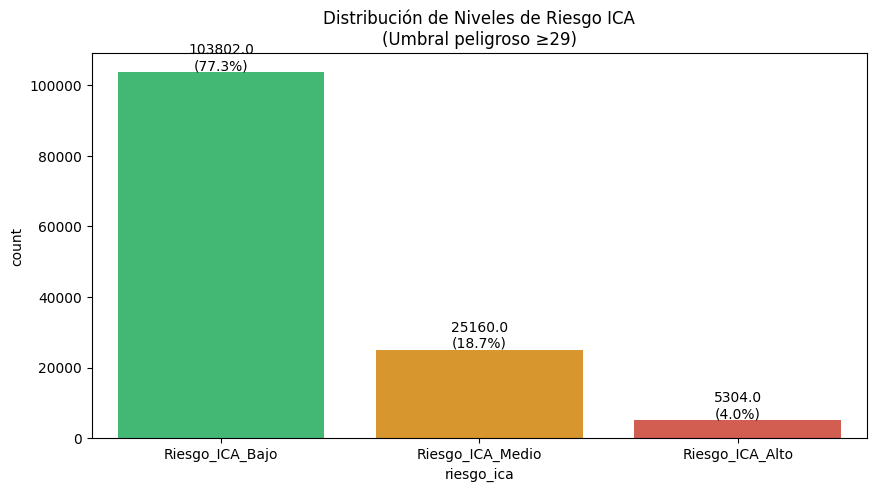

C:\Users\purdi\AppData\Local\Temp\ipykernel_14196\1508083833.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='riesgo_ica', y='muertes_por_100k', palette=['#2ecc71', '#f39c12', '#e74c3c'])
c:\Users\purdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\purdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\purdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.6% of the points ca

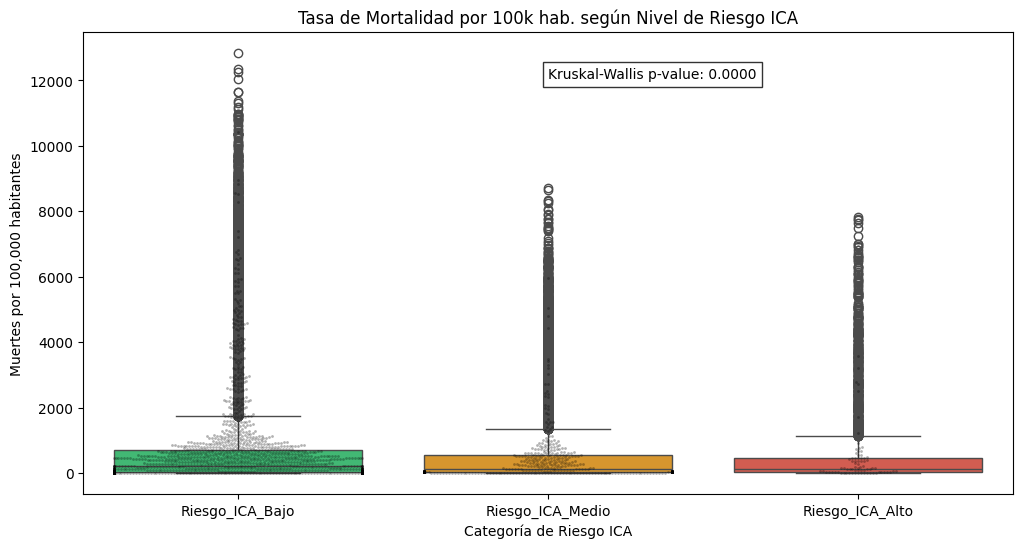

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Muestra solo una muestra aleatoria para el swarmplot si hay muchos datos
sample_df = df.sample(n=2000, random_state=42) if len(df) > 2000 else df

# Gráfico 1: Distribución de categorías de riesgo
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='riesgo_ica', palette=['#2ecc71', '#f39c12', '#e74c3c'])
plt.title("Distribución de Niveles de Riesgo ICA\n(Umbral peligroso ≥29)")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}\n({p.get_height()/len(df):.1%})', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# Gráfico 2: Mortalidad vs Riesgo ICA (boxplot + swarmplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='riesgo_ica', y='muertes_por_100k', palette=['#2ecc71', '#f39c12', '#e74c3c'])
sns.swarmplot(data=sample_df, x='riesgo_ica', y='muertes_por_100k', color='black', alpha=0.3, size=2)
plt.title("Tasa de Mortalidad por 100k hab. según Nivel de Riesgo ICA")
plt.xlabel("Categoría de Riesgo ICA")
plt.ylabel("Muertes por 100,000 habitantes")

# Test estadístico (Kruskal-Wallis para comparar grupos)
labels = df['riesgo_ica'].unique()
grupos = [df[df['riesgo_ica'] == cat]['muertes_por_100k'] for cat in labels]
h_stat, p_val = stats.kruskal(*grupos)
plt.text(0.5, 0.9, f'Kruskal-Wallis p-value: {p_val:.4f}', 
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

La mayoría de los valores de mortalidad están cerca de cero, pero hay algunos registros con tasas muy altas (outliers).
El test estadístico confirma que la mortalidad varía significativamente según el nivel de riesgo ICA.
Visualmente, puedes comparar la mediana y la dispersión de la mortalidad en cada grupo de riesgo.
En resumen:
La gráfica muestra que la tasa de mortalidad por 100k habitantes cambia según el nivel de riesgo ICA, y esta diferencia es estadísticamente significativa.

In [64]:
import pandas as pd
# 🔹 Agrupar por provincia y calcular la correlación
correlaciones_prov = (
    df.groupby('provincias')
    .apply(lambda g: g['muertes_por_causa'].corr(g['valor_ica']))
    .sort_values(ascending=False)
)

# 🔹 Mostrar resultados
print("🔍 Correlación entre ICA y muertes respiratorias por provincia:\n")
print(correlaciones_prov)

🔍 Correlación entre ICA y muertes respiratorias por provincia:

provincias
03 Alicante/Alacant          0.046033
08 Barcelona                 0.043576
45 Toledo                    0.042493
25 Lleida                    0.040155
32 Ourense                   0.040078
13 Ciudad Real               0.031098
21 Huelva                    0.028321
38 Santa Cruz de Tenerife    0.024113
20 Gipuzkoa                  0.023604
44 Teruel                    0.023499
28 Madrid                    0.021356
43 Tarragona                 0.021142
22 Huesca                    0.018638
31 Navarra                   0.014377
27 Lugo                      0.012240
07 Balears, Illes            0.009571
19 Guadalajara               0.001891
09 Burgos                    0.001209
26 Rioja, La                 0.001182
39 Cantabria                 0.000339
49 Zamora                   -0.002014
47 Valladolid               -0.002828
17 Girona                   -0.005342
34 Palencia                 -0.010247
06 Badajoz   

C:\Users\purdi\AppData\Local\Temp\ipykernel_14196\3602501566.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g['muertes_por_causa'].corr(g['valor_ica']))


In [65]:
for cat in df['riesgo_ica'].unique():
    print(f"\nCorrelaciones para {cat}:")
    print(df[df['riesgo_ica'] == cat][['muertes_por_100k', 'valor_ica', 'poblacion', 'altitud']].corr())


Correlaciones para Riesgo_ICA_Medio:
                  muertes_por_100k  valor_ica  poblacion   altitud
muertes_por_100k          1.000000  -0.006436  -0.157143  0.115325
valor_ica                -0.006436   1.000000  -0.002382  0.086958
poblacion                -0.157143  -0.002382   1.000000 -0.020391
altitud                   0.115325   0.086958  -0.020391  1.000000

Correlaciones para Riesgo_ICA_Bajo:
                  muertes_por_100k  valor_ica  poblacion   altitud
muertes_por_100k          1.000000  -0.058715  -0.145361  0.106499
valor_ica                -0.058715   1.000000   0.097346 -0.088703
poblacion                -0.145361   0.097346   1.000000 -0.116720
altitud                   0.106499  -0.088703  -0.116720  1.000000

Correlaciones para Riesgo_ICA_Alto:
                  muertes_por_100k  valor_ica  poblacion   altitud
muertes_por_100k          1.000000  -0.033810  -0.178131  0.258221
valor_ica                -0.033810   1.000000   0.142125 -0.286039
poblacion        

In [66]:
df.columns

Index(['causa_de_muerte', 'sexo', 'provincias', 'mes', 'anio',
       'muertes_por_causa', 'codigo_provincia', 'latitud_g', 'longitud_g',
       'altitud', 'tipo_area', 'valor_ica', 'CATEGORIA_ICA', 'partido',
       'poblacion', 'muertes_log', 'riesgo_ica', 'muertes_por_100k'],
      dtype='object')

In [71]:
df['sexo'].unique()

array(['Hombres', 'Mujeres'], dtype=object)

In [73]:
df['tipo_area'].unique()

array(['SUBURBANA', 'URBANA', 'RURAL'], dtype=object)

In [72]:
df['causa_de_muerte'].unique()

array(['001-008  I.Enfermedades infecciosas y parasitarias',
       '009-041  II.Tumores',
       '042-043  III.Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan al mecanismo de la inmunidad',
       '044-045  IV.Enfermedades endocrinas, nutricionales y metabólicas',
       '046-049  V.Trastornos mentales y del comportamiento',
       '050-052  VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos',
       '053-061 IX.Enfermedades del sistema circulatorio',
       '062-067  X.Enfermedades del sistema respiratorio',
       '068-072  XI.Enfermedades del sistema digestivo',
       '073  XII.Enfermedades de la piel y del tejido subcutáneo',
       '074-076  XIII.Enfermedades del sistema osteomuscular y del tejido conjuntivo',
       '077-080  XIV.Enfermedades del sistema genitourinario',
       '081  XV.Embarazo, parto y puerperio',
       '082  XVI.Afecciones originadas en el periodo perinatal',
       '083-085  XVII.Malforma

In [69]:
df['partido'].unique()

array(['PP', 'PSOE', 'PSC', 'PNV', 'CiU', 'UPN', 'DO', 'CC', 'IU'],
      dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Transformar la columna 'partido' en categórica con categorías fijas
partidos = ['PP', 'PSOE', 'PSC', 'PNV', 'CiU', 'UPN', 'DO', 'CC', 'IU']
df['partido'] = pd.Categorical(df['partido'], categories=partidos)

# One-hot encoding directamente en X
X = df[['valor_ica', 'codigo_provincia', 'altitud', 'partido', 'poblacion', 'muertes_log', ]]
X = pd.get_dummies(X, columns=['partido'], drop_first=True)

# Crear variable target categórica (baja, media, alta) según muertes_por_100k
df['clase_mortalidad'] = pd.qcut(df['muertes_por_100k'], q=3, labels=['baja', 'media', 'alta'])
y = df['clase_mortalidad']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Probabilidades de cada clase
probs = rf.predict_proba(X_test)
print("Probabilidades de cada clase para las primeras filas:\n", probs[:5])      

              precision    recall  f1-score   support

        alta       0.43      0.60      0.50     11189
        baja       0.70      0.47      0.56     11190
       media       0.36      0.34      0.35     11188

    accuracy                           0.47     33567
   macro avg       0.50      0.47      0.47     33567
weighted avg       0.50      0.47      0.47     33567

[[6686  494 4009]
 [3388 5207 2595]
 [5619 1777 3792]]
Probabilidades de cada clase para las primeras filas:
 [[0.32632905 0.11244832 0.56122264]
 [0.36879304 0.23426868 0.39693828]
 [0.35419806 0.2612306  0.38457134]
 [0.55971144 0.14508296 0.2952056 ]
 [0.45166566 0.08944508 0.45888926]]


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Categorizar variables
partidos = ['PP', 'PSOE', 'PSC', 'PNV', 'CiU', 'UPN', 'DO', 'CC', 'IU']
df['partido'] = pd.Categorical(df['partido'], categories=partidos)

tipo_area_cats = ['SUBURBANA', 'URBANA', 'RURAL']
df['tipo_area'] = pd.Categorical(df['tipo_area'], categories=tipo_area_cats)

causas_cats = [
    '001-008  I.Enfermedades infecciosas y parasitarias',
    '009-041  II.Tumores',
    '042-043  III.Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan al mecanismo de la inmunidad',
    '044-045  IV.Enfermedades endocrinas, nutricionales y metabólicas',
    '046-049  V.Trastornos mentales y del comportamiento',
    '050-052  VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos',
    '053-061 IX.Enfermedades del sistema circulatorio',
    '062-067  X.Enfermedades del sistema respiratorio',
    '068-072  XI.Enfermedades del sistema digestivo',
    '073  XII.Enfermedades de la piel y del tejido subcutáneo',
    '074-076  XIII.Enfermedades del sistema osteomuscular y del tejido conjuntivo',
    '077-080  XIV.Enfermedades del sistema genitourinario',
    '081  XV.Embarazo, parto y puerperio',
    '082  XVI.Afecciones originadas en el periodo perinatal',
    '083-085  XVII.Malformaciones congénitas, deformidades y anomalías cromosómicas',
    '086-089  XVIII.Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte',
    '090-102  XX.Causas externas de mortalidad'
]
df['causa_de_muerte'] = pd.Categorical(df['causa_de_muerte'], categories=causas_cats)

sexo_cats = ['Hombres', 'Mujeres']
df['sexo'] = pd.Categorical(df['sexo'], categories=sexo_cats)

# One-hot encoding directamente en X (incluyendo nuevas variables categóricas)
X = df[['valor_ica', 'codigo_provincia', 'altitud', 'partido', 'poblacion', 'tipo_area', 'causa_de_muerte', 'sexo']]
X = pd.get_dummies(X, columns=['partido', 'tipo_area', 'causa_de_muerte', 'sexo'], drop_first=True)

# Crear variable target categórica (baja, media, alta) según muertes_por_100k
df['clase_mortalidad'] = pd.qcut(df['muertes_por_100k'], q=3, labels=['baja', 'media', 'alta'])
y = df['clase_mortalidad']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Probabilidades de cada clase
probs = rf.predict_proba(X_test)
print("Probabilidades de cada clase para las primeras filas:\n", probs[:5])

              precision    recall  f1-score   support

        alta       0.89      0.89      0.89     11189
        baja       0.91      0.90      0.90     11190
       media       0.82      0.83      0.82     11188

    accuracy                           0.87     33567
   macro avg       0.87      0.87      0.87     33567
weighted avg       0.87      0.87      0.87     33567

[[ 9996   103  1090]
 [  199 10070   921]
 [  989   952  9247]]
Probabilidades de cada clase para las primeras filas:
 [[0.97 0.   0.03]
 [0.   0.   1.  ]
 [0.98 0.   0.02]
 [0.97 0.   0.03]
 [0.   0.92 0.08]]


Variables más importantes:
poblacion                                                                                                                                                 0.288327
valor_ica                                                                                                                                                 0.123224
causa_de_muerte_081  XV.Embarazo, parto y puerperio                                                                                                       0.071461
causa_de_muerte_082  XVI.Afecciones originadas en el periodo perinatal                                                                                    0.067399
causa_de_muerte_083-085  XVII.Malformaciones congénitas, deformidades y anomalías cromosómicas                                                            0.058959
causa_de_muerte_062-067  X.Enfermedades del sistema respiratorio                                                                                          0.03

C:\Users\purdi\AppData\Local\Temp\ipykernel_14196\2977138730.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


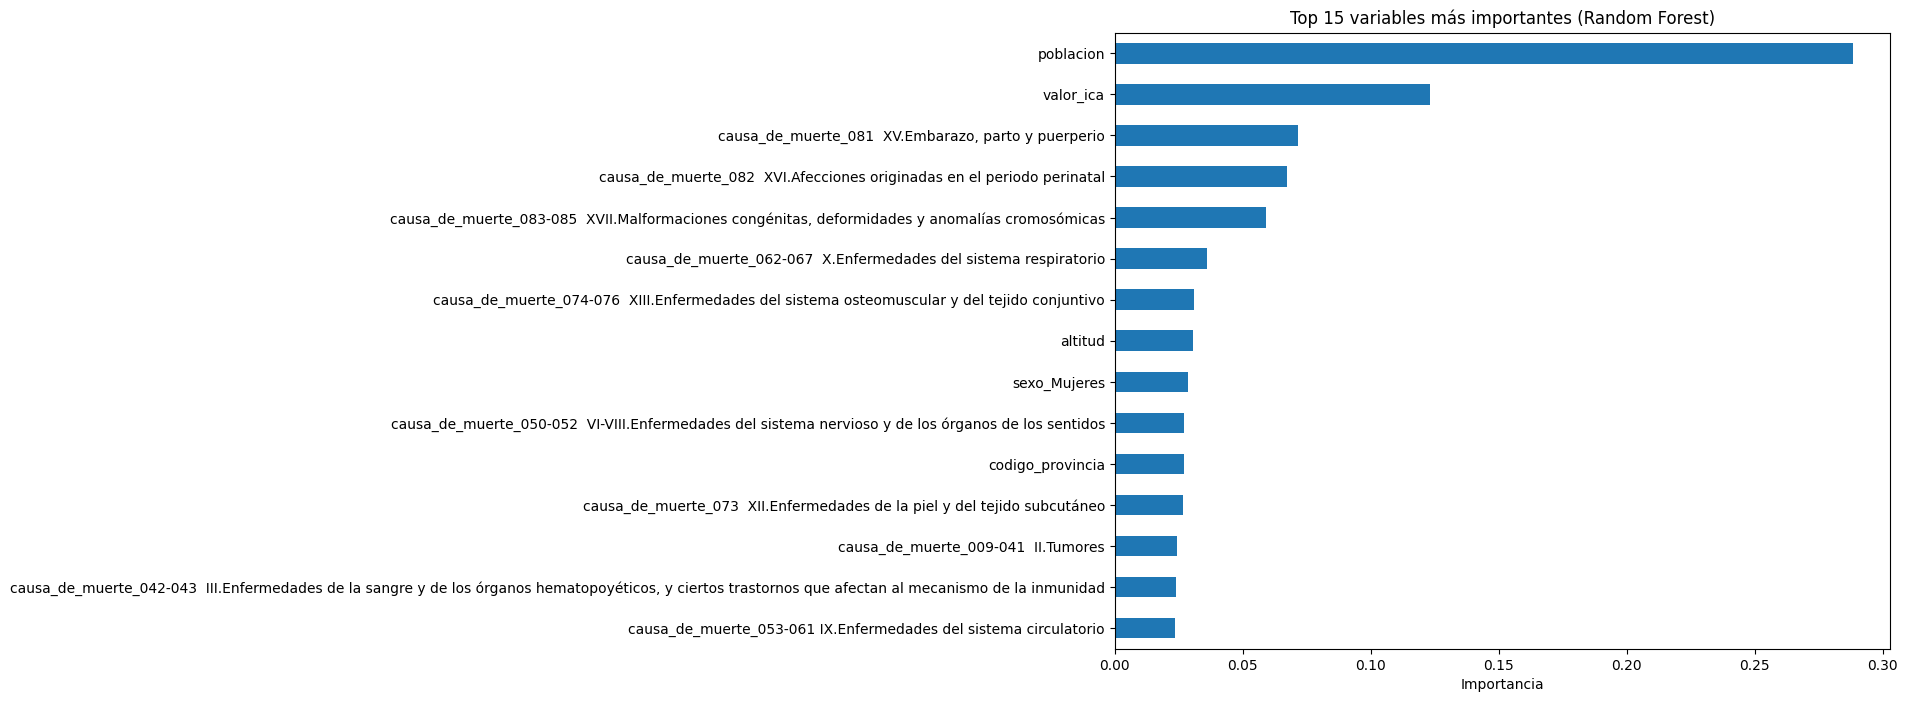

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtener la importancia de las variables
importances = rf.feature_importances_
feature_names = X.columns

# Crear un DataFrame ordenado por importancia
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Mostrar las 15 variables más importantes
print("Variables más importantes:")
print(feat_imp.head(15))

# Visualización
plt.figure(figsize=(10, 8))
feat_imp.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 variables más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

para  ver a nivel variable cual afecta mas:

In [79]:
import pandas as pd

# Crear un DataFrame con las importancias y los nombres de las variables
feat_imp_df = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

# Función para extraer el nombre base de la variable
def get_base_var(col):
    return col.split('_')[0] if '_' in col else col

feat_imp_df['base_var'] = feat_imp_df['feature'].apply(get_base_var)

# Sumar importancia por variable original
grouped_importance = feat_imp_df.groupby('base_var')['importance'].sum().sort_values(ascending=False)

print("Importancia agrupada por variable original:")
print(grouped_importance)

Importancia agrupada por variable original:
base_var
causa        0.475750
poblacion    0.288327
valor        0.123224
altitud      0.030479
sexo         0.028537
codigo       0.026840
partido      0.017895
tipo         0.008949
Name: importance, dtype: float64


vamos a tratar de mejorar los resultados de la clasificacion variando parametros:

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# --- Preprocesamiento y categorización ---
partidos = ['PP', 'PSOE', 'PSC', 'PNV', 'CiU', 'UPN', 'DO', 'CC', 'IU']
df['partido'] = pd.Categorical(df['partido'], categories=partidos)

tipo_area_cats = ['SUBURBANA', 'URBANA', 'RURAL']
df['tipo_area'] = pd.Categorical(df['tipo_area'], categories=tipo_area_cats)

causas_cats = [
    '001-008  I.Enfermedades infecciosas y parasitarias',
    '009-041  II.Tumores',
    '042-043  III.Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan al mecanismo de la inmunidad',
    '044-045  IV.Enfermedades endocrinas, nutricionales y metabólicas',
    '046-049  V.Trastornos mentales y del comportamiento',
    '050-052  VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos',
    '053-061 IX.Enfermedades del sistema circulatorio',
    '062-067  X.Enfermedades del sistema respiratorio',
    '068-072  XI.Enfermedades del sistema digestivo',
    '073  XII.Enfermedades de la piel y del tejido subcutáneo',
    '074-076  XIII.Enfermedades del sistema osteomuscular y del tejido conjuntivo',
    '077-080  XIV.Enfermedades del sistema genitourinario',
    '081  XV.Embarazo, parto y puerperio',
    '082  XVI.Afecciones originadas en el periodo perinatal',
    '083-085  XVII.Malformaciones congénitas, deformidades y anomalías cromosómicas',
    '086-089  XVIII.Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte',
    '090-102  XX.Causas externas de mortalidad'
]
df['causa_de_muerte'] = pd.Categorical(df['causa_de_muerte'], categories=causas_cats)

sexo_cats = ['Hombres', 'Mujeres']
df['sexo'] = pd.Categorical(df['sexo'], categories=sexo_cats)

# --- Features y target ---
X = df[['valor_ica', 'codigo_provincia', 'altitud', 'partido', 'poblacion', 'tipo_area', 'causa_de_muerte', 'sexo']]
X = pd.get_dummies(X, columns=['partido', 'tipo_area', 'causa_de_muerte', 'sexo'], drop_first=True)
df['clase_mortalidad'] = pd.qcut(df['muertes_por_100k'], q=3, labels=['baja', 'media', 'alta'])
y = df['clase_mortalidad']

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# --- Grid Search con validación cruzada ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor accuracy (validación cruzada):", grid_search.best_score_)

# --- Evaluación en test ---
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# # Probabilidades de cada clase
probs = best_rf.predict_proba(X_test)
print("Probabilidades de cada clase para las primeras filas:\n", probs[:5])

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mejor accuracy (validación cruzada): 0.8779034868537547
              precision    recall  f1-score   support

        alta       0.90      0.90      0.90     11189
        baja       0.91      0.90      0.91     11190
       media       0.83      0.84      0.83     11188

    accuracy                           0.88     33567
   macro avg       0.88      0.88      0.88     33567
weighted avg       0.88      0.88      0.88     33567

[[10020    93  1076]
 [  201 10096   893]
 [  926   860  9402]]
Probabilidades de cada clase para las primeras filas:
 [[0.92310614 0.00294672 0.07394714]
 [0.00414286 0.00583333 0.99002381]
 [0.97133055 0.00357213 0.02509732]
 [0.98463966 0.         0.01536034]
 [0.         0.86782867 0.13217133]]


Variables más importantes (modelo optimizado):
poblacion                                                                                              0.273616
valor_ica                                                                                              0.088704
causa_de_muerte_081  XV.Embarazo, parto y puerperio                                                    0.078941
causa_de_muerte_082  XVI.Afecciones originadas en el periodo perinatal                                 0.074078
causa_de_muerte_083-085  XVII.Malformaciones congénitas, deformidades y anomalías cromosómicas         0.065942
causa_de_muerte_062-067  X.Enfermedades del sistema respiratorio                                       0.038516
causa_de_muerte_074-076  XIII.Enfermedades del sistema osteomuscular y del tejido conjuntivo           0.034595
altitud                                                                                                0.032800
causa_de_muerte_050-052  VI-VIII.Enfermedades del sistema

Text(0.5, 0, 'Importancia')

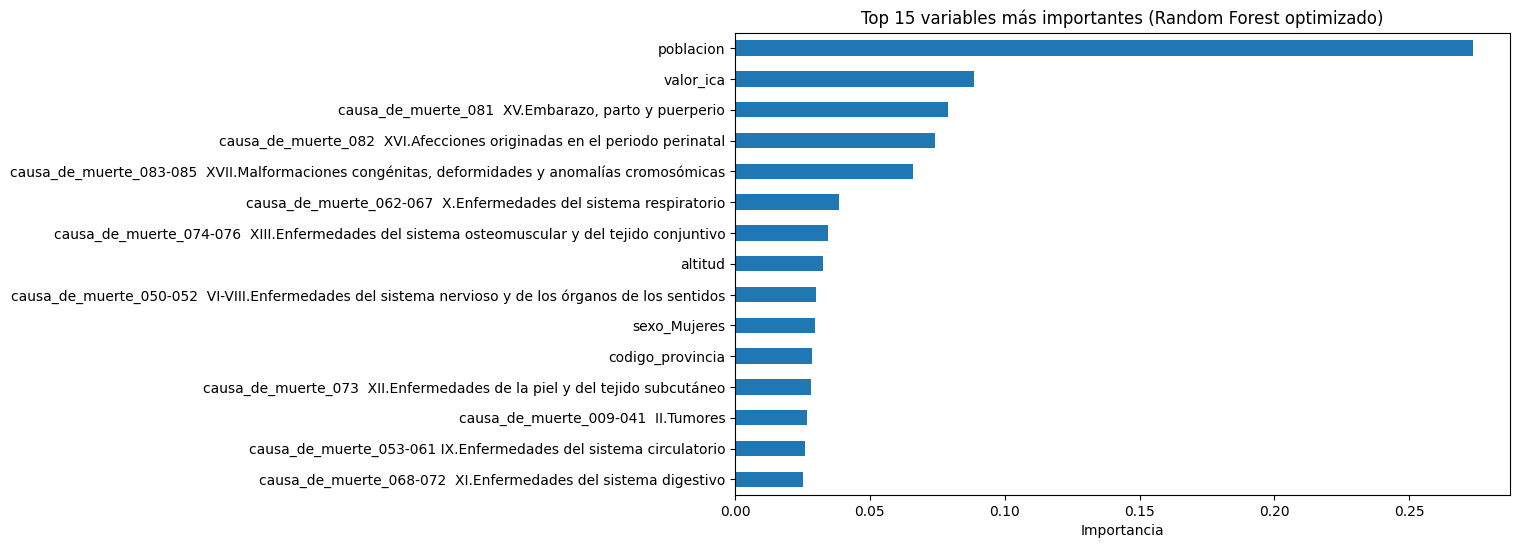

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Importancia de las variables con el mejor modelo
importances = best_rf.feature_importances_
feature_names = X.columns

# Crear un DataFrame ordenado por importancia
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Mostrar las 15 variables más importantes
print("Variables más importantes (modelo optimizado):")
print(feat_imp.head(15))

# Visualización
plt.figure(figsize=(10, 6))
feat_imp.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 variables más importantes (Random Forest optimizado)")
plt.xlabel("Importancia")

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# --- Preprocesamiento y categorización ---
partidos = ['PP', 'PSOE', 'PSC', 'PNV', 'CiU', 'UPN', 'DO', 'CC', 'IU']
df['partido'] = pd.Categorical(df['partido'], categories=partidos)

tipo_area_cats = ['SUBURBANA', 'URBANA', 'RURAL']
df['tipo_area'] = pd.Categorical(df['tipo_area'], categories=tipo_area_cats)

causas_cats = [
    '001-008  I.Enfermedades infecciosas y parasitarias',
    '009-041  II.Tumores',
    '042-043  III.Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan al mecanismo de la inmunidad',
    '044-045  IV.Enfermedades endocrinas, nutricionales y metabólicas',
    '046-049  V.Trastornos mentales y del comportamiento',
    '050-052  VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos',
    '053-061 IX.Enfermedades del sistema circulatorio',
    '062-067  X.Enfermedades del sistema respiratorio',
    '068-072  XI.Enfermedades del sistema digestivo',
    '073  XII.Enfermedades de la piel y del tejido subcutáneo',
    '074-076  XIII.Enfermedades del sistema osteomuscular y del tejido conjuntivo',
    '077-080  XIV.Enfermedades del sistema genitourinario',
    '081  XV.Embarazo, parto y puerperio',
    '082  XVI.Afecciones originadas en el periodo perinatal',
    '083-085  XVII.Malformaciones congénitas, deformidades y anomalías cromosómicas',
    '086-089  XVIII.Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte',
    '090-102  XX.Causas externas de mortalidad'
]
df['causa_de_muerte'] = pd.Categorical(df['causa_de_muerte'], categories=causas_cats)

sexo_cats = ['Hombres', 'Mujeres']
df['sexo'] = pd.Categorical(df['sexo'], categories=sexo_cats)

# --- Features y target (añadiendo coordenadas) ---
X = df[['valor_ica', 'codigo_provincia', 'altitud', 'partido', 'poblacion', 'tipo_area', 'causa_de_muerte', 'sexo', 'latitud_g', 'longitud_g']]
X = pd.get_dummies(X, columns=['partido', 'tipo_area', 'causa_de_muerte', 'sexo'], drop_first=True)
df['clase_mortalidad'] = pd.qcut(df['muertes_por_100k'], q=3, labels=['baja', 'media', 'alta'])
y = df['clase_mortalidad']

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# --- Grid Search con validación cruzada ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Después de ajustar grid_search y obtener el mejor estimador
best_rf = grid_search.best_estimator_

# Evaluación en train (sobre el split de entrenamiento)
y_train_pred = best_rf.predict(X_train)
print("Reporte en TRAIN:")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

# Evaluación en test (split de test)
print("Reporte en TEST:")
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor accuracy (validación cruzada):", grid_search.best_score_)

# --- Evaluación en test ---
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Probabilidades de cada clase
probs = best_rf.predict_proba(X_test)
print("Probabilidades de cada clase para las primeras filas:\n", probs[:5])

Reporte en TRAIN:
              precision    recall  f1-score   support

        alta       0.97      0.97      0.97     33567
        baja       0.97      0.97      0.97     33567
       media       0.95      0.95      0.95     33565

    accuracy                           0.96    100699
   macro avg       0.96      0.96      0.96    100699
weighted avg       0.96      0.96      0.96    100699

[[32633    13   921]
 [  221 32447   899]
 [  673   874 32018]]
Reporte en TEST:
              precision    recall  f1-score   support

        alta       0.90      0.89      0.90     11189
        baja       0.91      0.90      0.91     11190
       media       0.83      0.84      0.83     11188

    accuracy                           0.88     33567
   macro avg       0.88      0.88      0.88     33567
weighted avg       0.88      0.88      0.88     33567

[[10004    97  1088]
 [  196 10100   894]
 [  934   881  9373]]
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_sa

Como no ha mejorado añadiendo las coordenadas, ya que la informacion geografica ya está recogida en el codigo de la provincia, prefiero no incorporarlas por simplicidad del método.

In [84]:
import joblib

# Entrena el modelo final SIN coordenadas
X = df[['valor_ica', 'codigo_provincia', 'altitud', 'partido', 'poblacion', 'tipo_area', 'causa_de_muerte', 'sexo']]
X = pd.get_dummies(X, columns=['partido', 'tipo_area', 'causa_de_muerte', 'sexo'], drop_first=True)
y = df['clase_mortalidad']

best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42
)
best_rf.fit(X, y)

# Guarda el modelo entrenado
joblib.dump(best_rf, 'modelo_random_forest_mortalidad.pkl')
print("Modelo guardado como modelo_random_forest_mortalidad.pkl")

Modelo guardado como modelo_random_forest_mortalidad.pkl


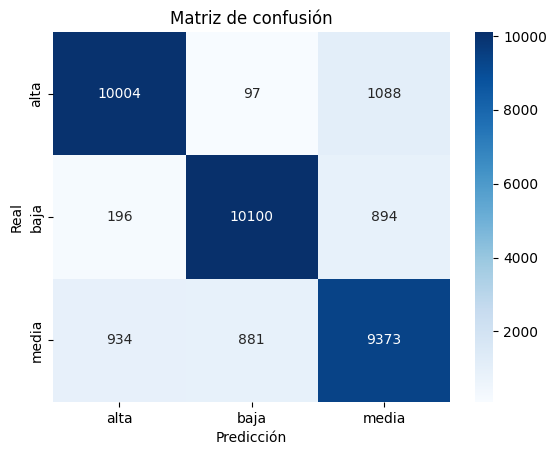

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=['alta', 'baja', 'media'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['alta', 'baja', 'media'], yticklabels=['alta', 'baja', 'media'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()


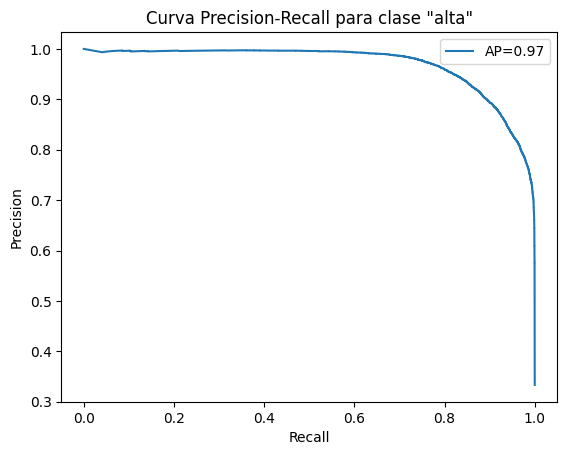

In [91]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Probabilidades para la clase "alta"
probs_alta = probs[:, 0]  # Asegúrate que el índice coincide con la clase 'alta'

y_test_binaria = (y_test == 'alta').astype(int)

precision, recall, thresholds = precision_recall_curve(y_test_binaria, probs_alta)
avg_prec = average_precision_score(y_test_binaria, probs_alta)

plt.plot(recall, precision, label=f'AP={avg_prec:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall para clase "alta"')
plt.legend()
plt.show()


In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_alta = precision_score(y_test, y_pred, labels=['alta'], average='macro')
recall_alta = recall_score(y_test, y_pred, labels=['alta'], average='macro')
f1_alta = f1_score(y_test, y_pred, labels=['alta'], average='macro')

print(f'Clase alta — Precision: {precision_alta:.3f}, Recall: {recall_alta:.3f}, F1-score: {f1_alta:.3f}')


Clase alta — Precision: 0.899, Recall: 0.894, F1-score: 0.896


In [95]:
print("Número de datos evaluados:", probs.shape[0])


Número de datos evaluados: 33567


In [96]:
df.head()


,causa_de_muerte,sexo,provincias,mes,anio,muertes_por_causa,codigo_provincia,latitud_g,longitud_g,altitud,tipo_area,valor_ica,CATEGORIA_ICA,partido,poblacion,muertes_log,riesgo_ica,muertes_por_100k,clase_mortalidad
7898,001-008 I.Enfermedades infecciosas y parasita...,Hombres,02 Albacete,1,2022,181.539235,2,38.9808,-1.8452,691.0,SUBURBANA,22.778847,Buena,PP,199208.0,5.206965,Riesgo_ICA_Medio,91.130494,media
7899,001-008 I.Enfermedades infecciosas y parasita...,Hombres,02 Albacete,2,2022,130.835010,2,38.9808,-1.8452,691.0,SUBURBANA,20.110090,Razonablemente buena,PP,11435.0,4.881551,Riesgo_ICA_Medio,1144.162746,alta
7900,001-008 I.Enfermedades infecciosas y parasita...,Hombres,02 Albacete,3,2022,150.301811,2,38.9808,-1.8452,691.0,SUBURBANA,26.769706,Buena,PP,10762.0,5.019277,Riesgo_ICA_Medio,1396.597388,alta
7901,001-008 I.Enfermedades infecciosas y parasita...,Hombres,02 Albacete,4,2022,156.187123,2,38.9808,-1.8452,691.0,SUBURBANA,8.073927,Buena,PP,10089.0,5.057437,Riesgo_ICA_Bajo,1548.093198,alta
7902,001-008 I.Enfermedades infecciosas y parasita...,Hombres,02 Albacete,5,2022,155.734406,2,38.9808,-1.8452,691.0,SUBURBANA,13.674748,Buena,PP,9415.0,5.054553,Riesgo_ICA_Bajo,1654.109468,alta


In [97]:
df.columns.to_list()

['causa_de_muerte',
 'sexo',
 'provincias',
 'mes',
 'anio',
 'muertes_por_causa',
 'codigo_provincia',
 'latitud_g',
 'longitud_g',
 'altitud',
 'tipo_area',
 'valor_ica',
 'CATEGORIA_ICA',
 'partido',
 'poblacion',
 'muertes_log',
 'riesgo_ica',
 'muertes_por_100k',
 'clase_mortalidad']